[IPython Notebook](rotstar_pulsations.ipynb) |  [Python Script](rotstar_pulsations.py)

Single Star with Pulsations
============================

**NOTE: pulsations are currently being tested but not yet supported**

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.default_star()

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Adding Pulsations
---------------------

In [2]:
b.add_feature('pulsation', component='starA', feature='puls01', m=0, l=0)

<ParameterSet: 5 parameters | qualifiers: freq, radamp, m, teffext, l>

In [3]:
b.add_feature('pulsation', component='starA', feature='puls02', m=1, l=1)

<ParameterSet: 5 parameters | qualifiers: freq, radamp, m, teffext, l>

Pulsation Parameters
-----------------

Pulsations are defined by a frequency and amplitude

In [4]:
print b['puls01']

ParameterSet: 5 parameters
           radamp@puls01@feature: 0.1
             freq@puls01@feature: 1.0 1 / d
                l@puls01@feature: 0.0
                m@puls01@feature: 0.0
          teffext@puls01@feature: False


In [5]:
print b['puls02']

ParameterSet: 5 parameters
           radamp@puls02@feature: 0.1
             freq@puls02@feature: 1.0 1 / d
                l@puls02@feature: 1.0
                m@puls02@feature: 1.0
          teffext@puls02@feature: False


In [6]:
b.add_dataset('lc', times=np.linspace(0,3,21))

<ParameterSet: 9 parameters | kinds: LC, LC_dep>

In [7]:
b.run_compute(distortion_method='rotstar', store_mesh=True)

/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/universe.py:3013: ComplexWarning: Casting complex values to real discards the imaginary part
  new_coords[:,0] = coords_for_computations[:,0] + xi_r * np.sin(theta) * np.cos(phi)
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/universe.py:3014: ComplexWarning: Casting complex values to real discards the imaginary part
  new_coords[:,1] = coords_for_computations[:,1] + xi_r * np.sin(theta) * np.sin(phi)
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/universe.py:3015: ComplexWarning: Casting complex values to real discards the imaginary part
  new_coords[:,2] = coords_for_computations[:,2] + xi_r * np.cos(theta)
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/universe.py:3044: ComplexWarning: Casting complex values to real discards the imaginary part
  new_coords[:,0] = coords_for_observations[:,0] + xi_r * np.sin(theta) * np.cos(phi)
/home/kyle/.local/lib/python2.7/site-packages/phoebe/b

<ParameterSet: 648 parameters | kinds: MESH, LC>

/home/kyle/.local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:242: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:
/home/kyle/.local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:242: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:
/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):



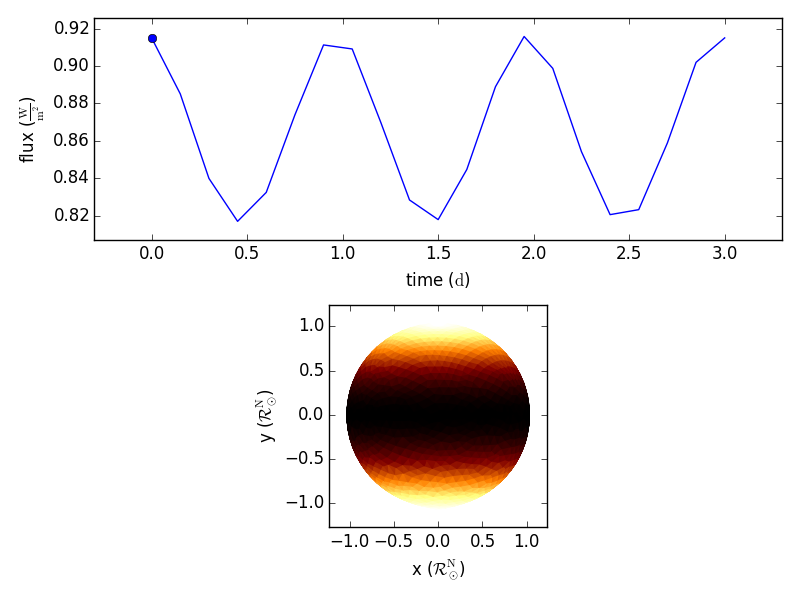
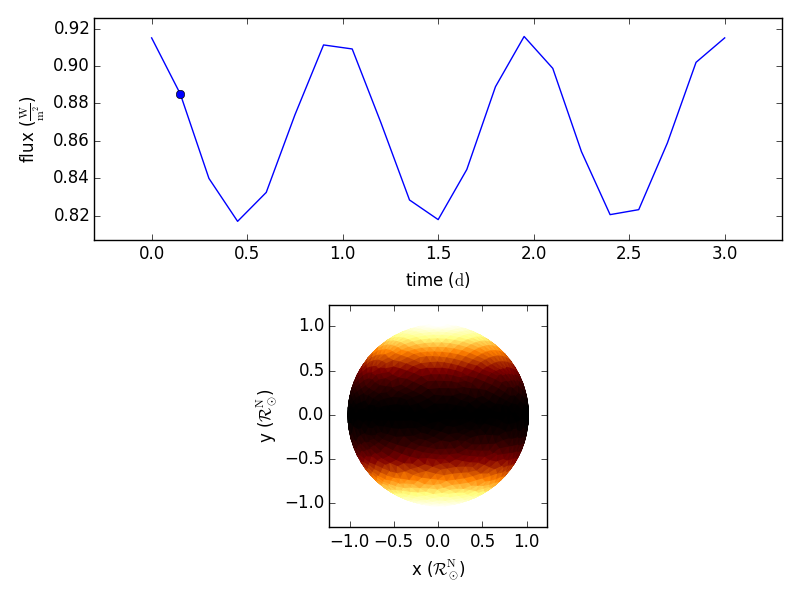
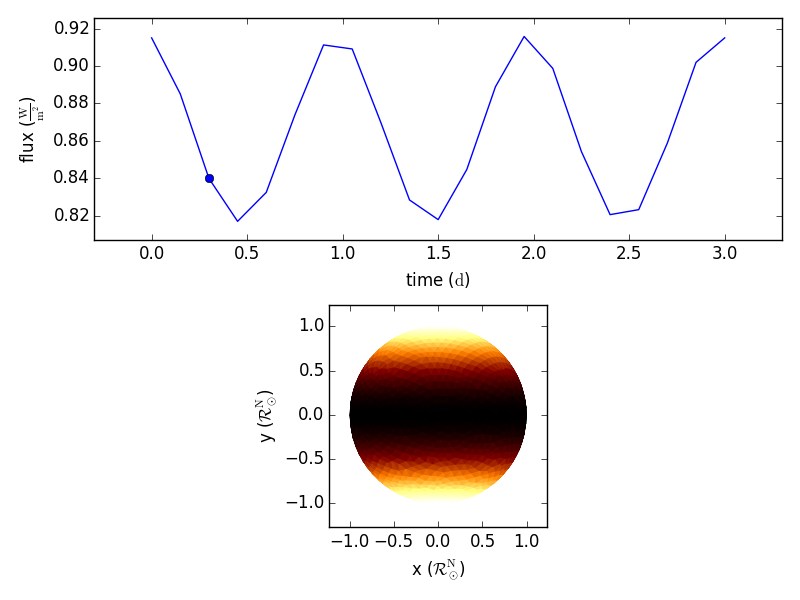
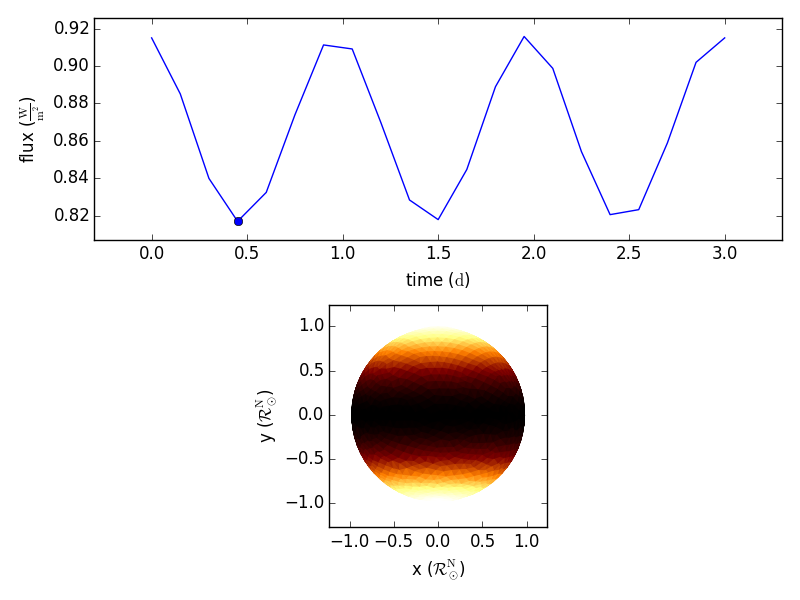
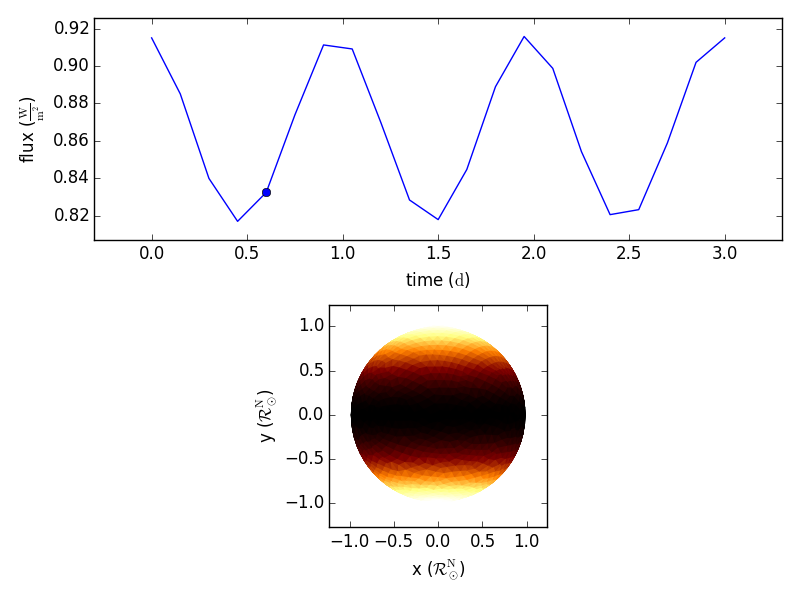
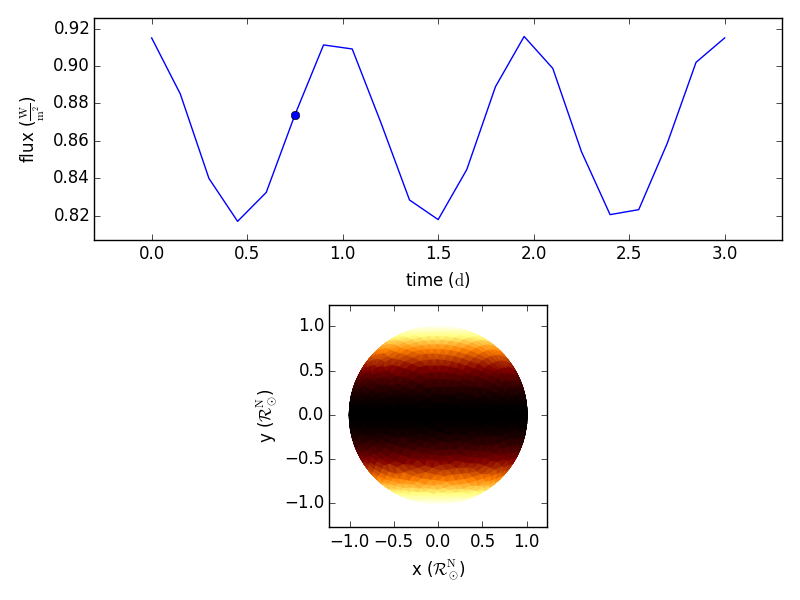
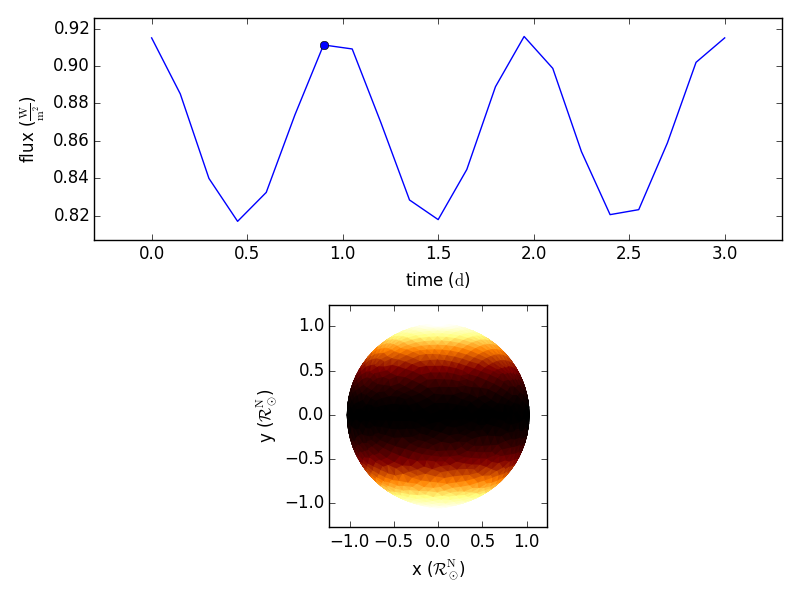
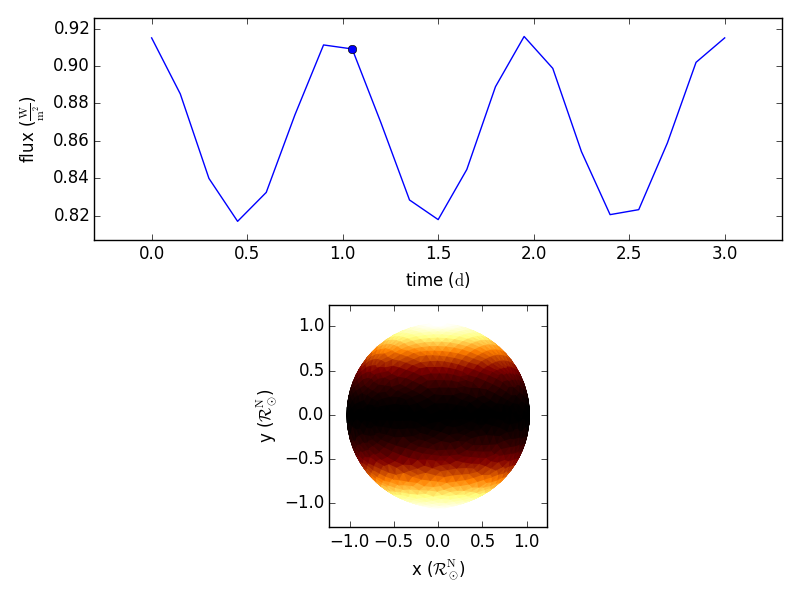
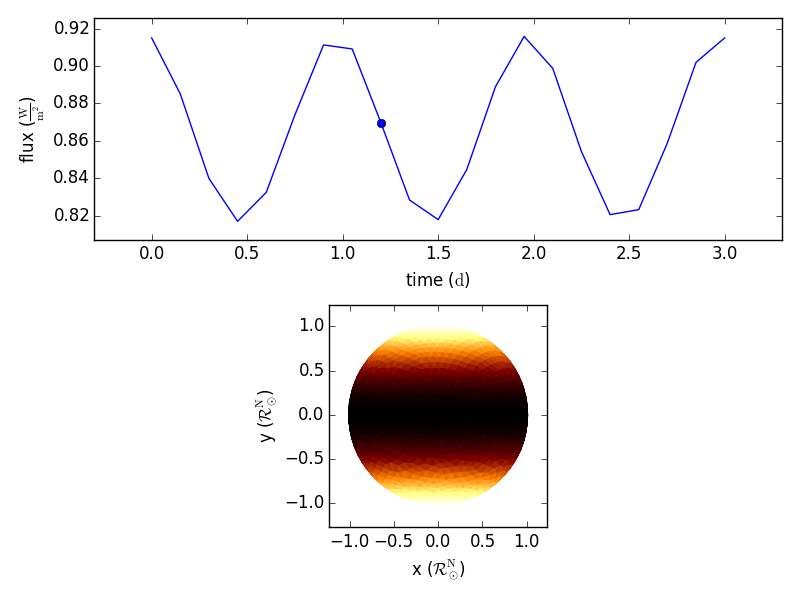
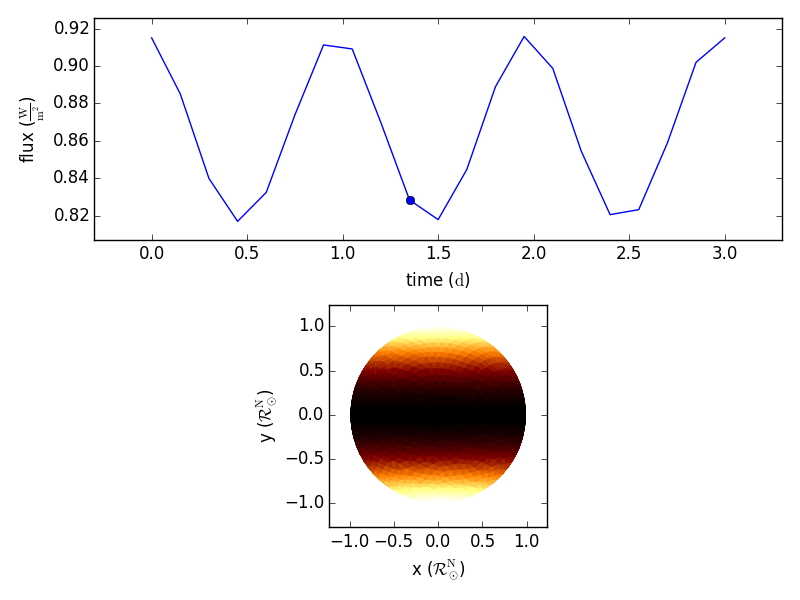
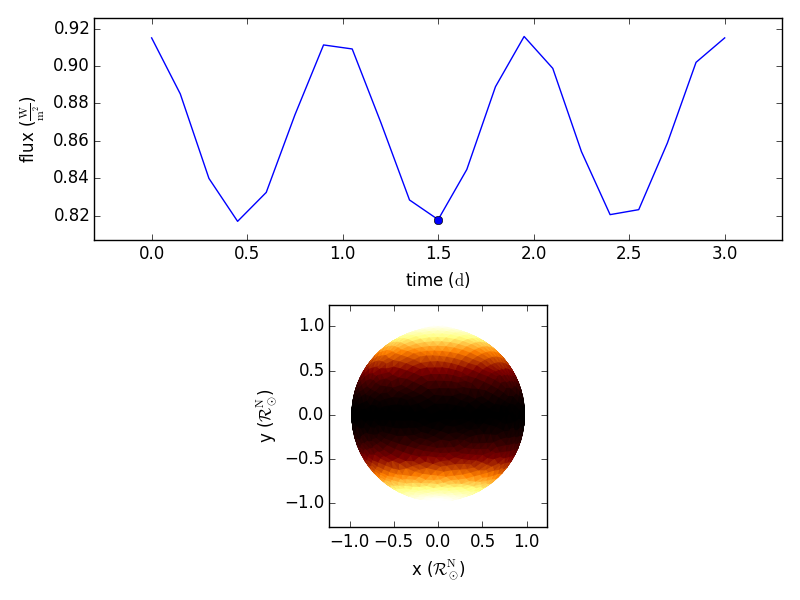
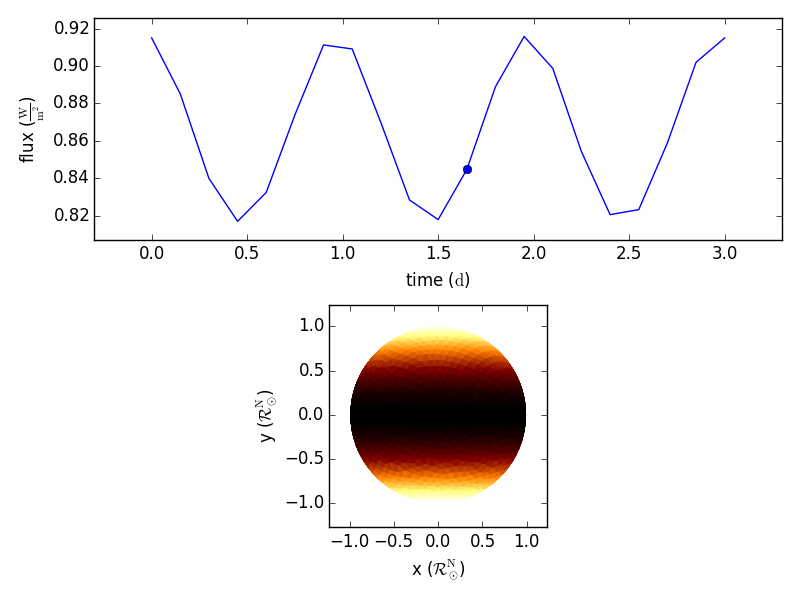
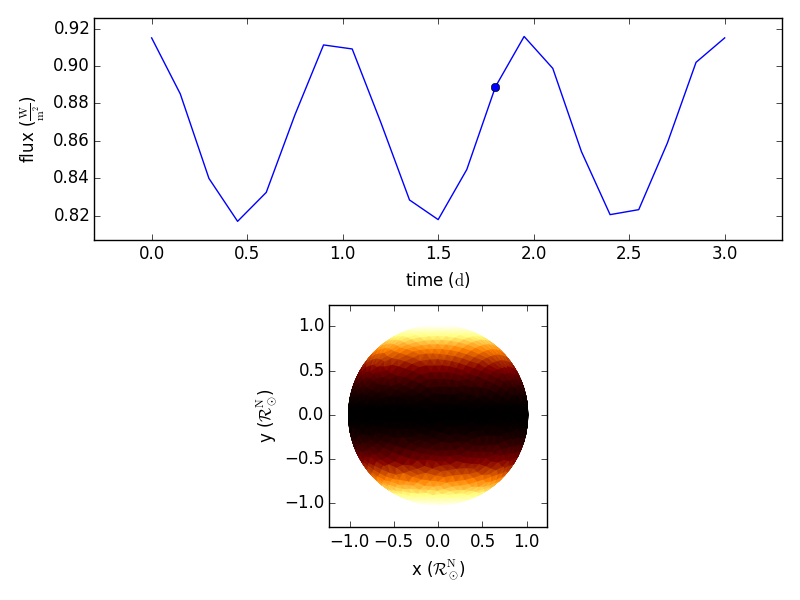
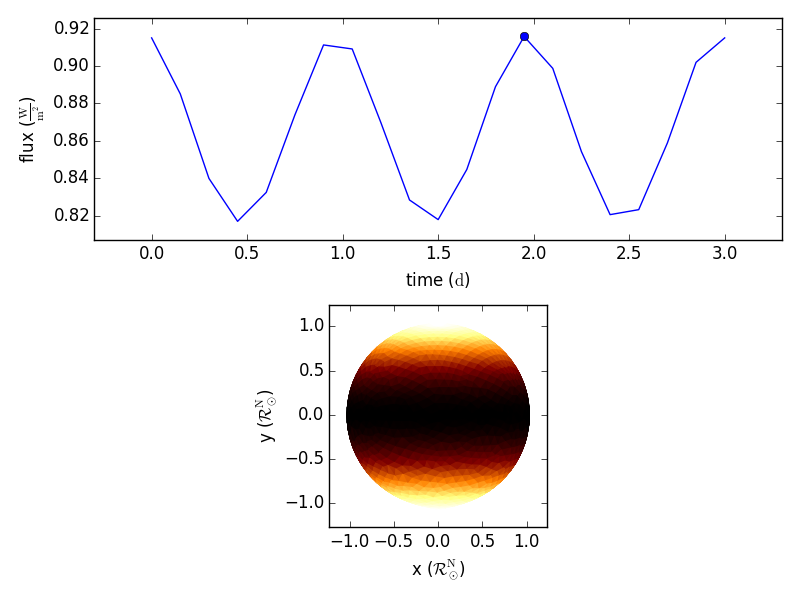
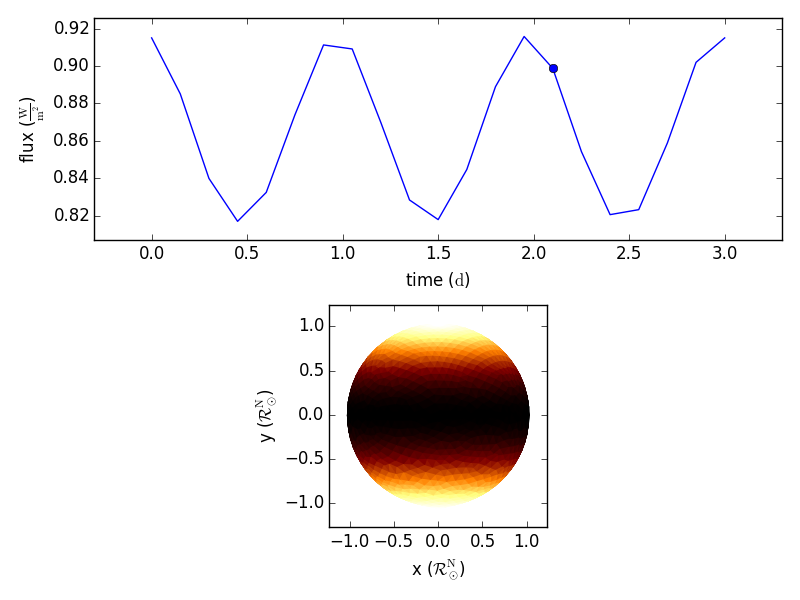
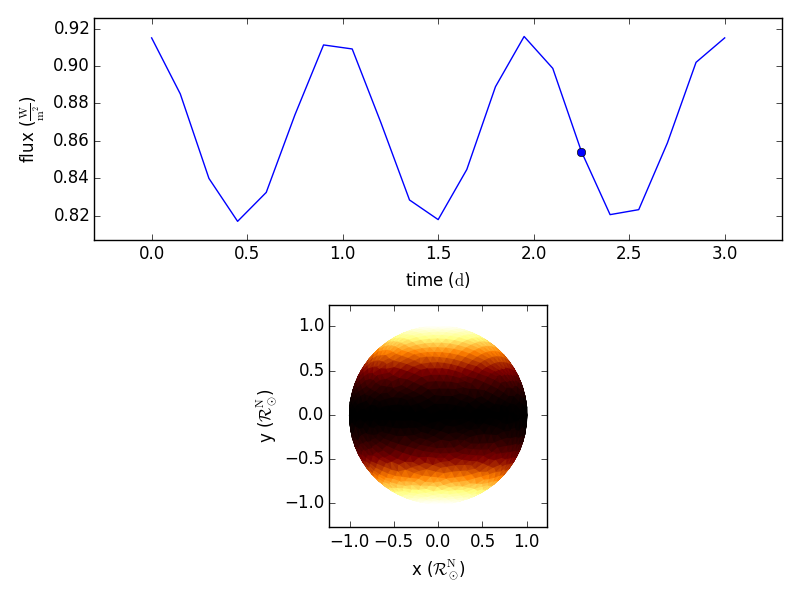
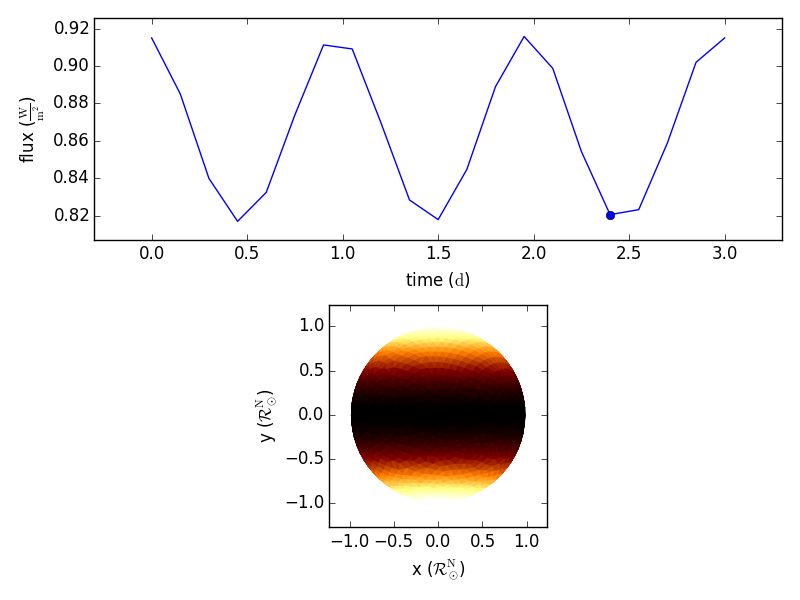
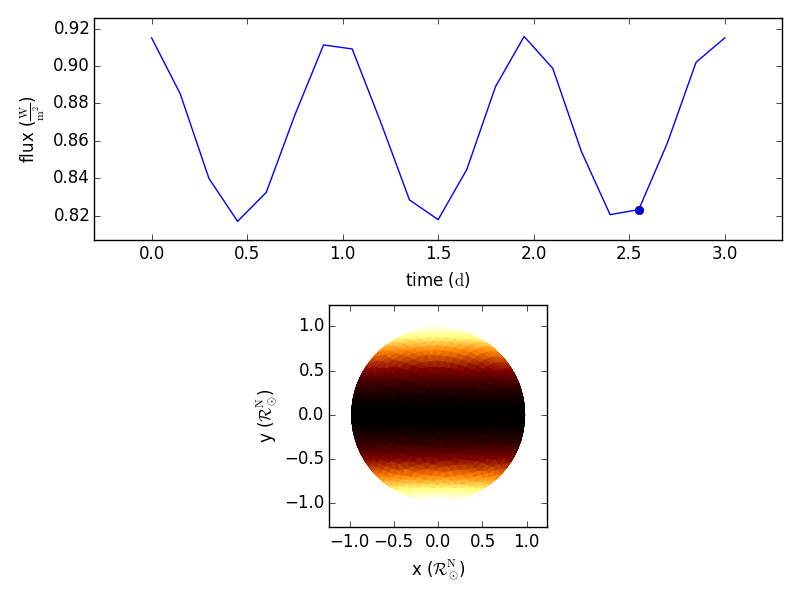
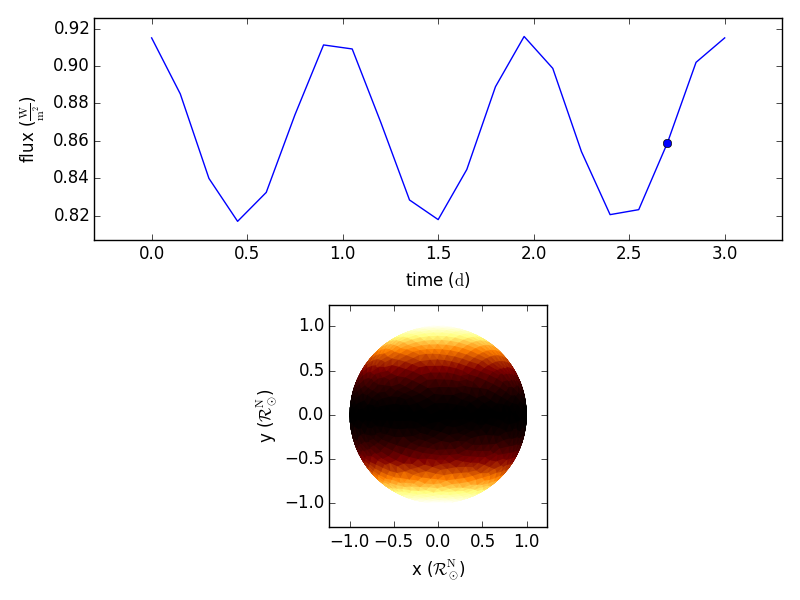
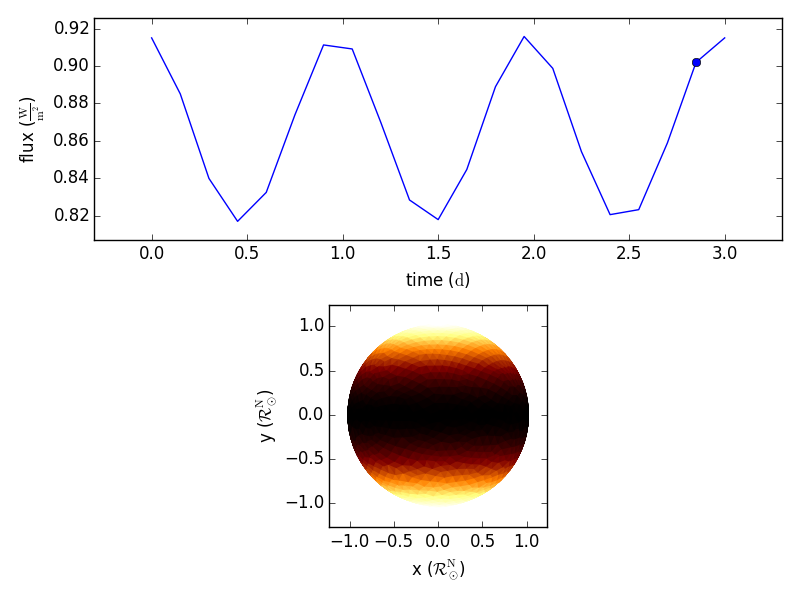
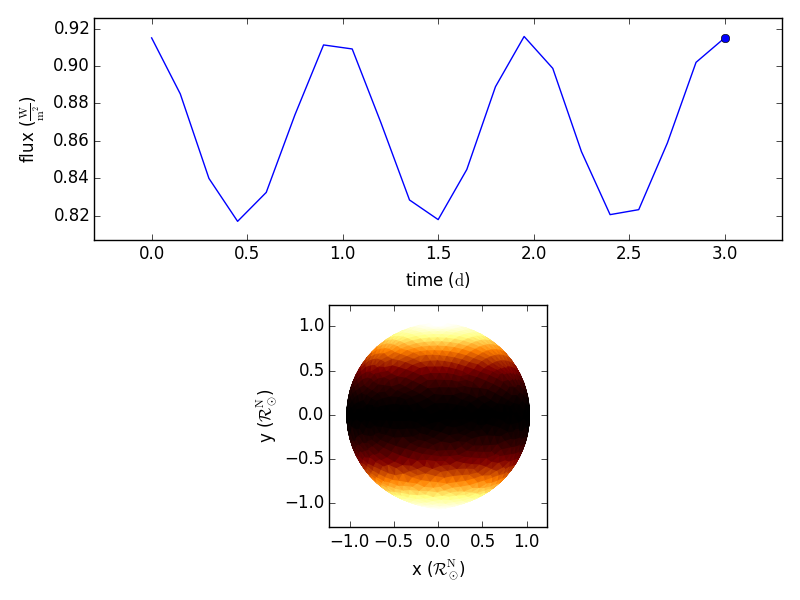

In [8]:
b['model'].animate(facecolor='teffs', edgecolor=None)